In [31]:
import numpy as np
import scipy.io as sio
import sklearn.cluster as skc
import matplotlib.pyplot as plt
filename='../data/curated_bold.mat'
data=sio.loadmat(filename)

In [15]:
data['roiEpochs'].shape

(3, 20, 151, 621)

In [47]:
echo_idx=1
subject_idx=2
bold_2d = np.squeeze(data['roiEpochs'][echo_idx,subject_idx,1:,:]).T
bold_2d.shape

(621, 150)

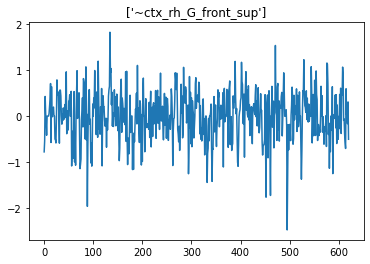

In [82]:
roi_idx=15+75
bold_time_series=bold_2d[:,roi_idx]
labels=data['subLabels'][0][1:]
plt.plot(bold_time_series)
plt.title(labels[roi_idx])
plt.show()

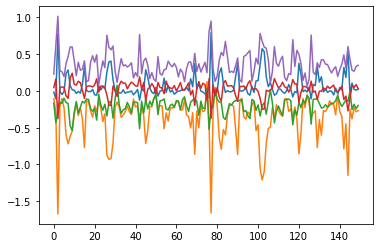

In [72]:
kmeans = skc.KMeans(n_clusters=5, random_state=0).fit(bold_2d)
centroids=kmeans.cluster_centers_
plt.plot(centroids.T)
plt.show()

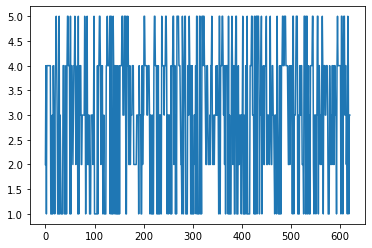

In [65]:
plt.plot(kmeans.labels_+1)

In [59]:
kmeans.inertia_

10576.15448359434

In [109]:
idx_pre=np.arange(193)
idx_stim=np.arange(193,407)
idx_post=np.arange(408,621)
bc_pre = np.bincount(kmeans.labels_[idx_pre])/np.shape(idx_pre)
bc_stim = np.bincount(kmeans.labels_[idx_stim])/np.shape(idx_stim)
bc_post = np.bincount(kmeans.labels_[idx_post])/np.shape(idx_post)
print(bc_pre)
print(bc_stim)
print(bc_post)

[0.2642487  0.10362694 0.19170984 0.31606218 0.12435233]
[0.24299065 0.08878505 0.21495327 0.28971963 0.1635514 ]
[0.19248826 0.10798122 0.23004695 0.28638498 0.18309859]


In [108]:
bc_pre = np.bincount(kmeans.labels_[idx_pre])/np.shape(idx_pre)


In [18]:
TR=2.8
winshift=10 # units of TR
winlen=20 # units of TR
#n*winshift+winlen < n_tr
n_wins = np.floor((bold_2d.shape[1]-winlen)/winshift)
print(n_wins)

60.0


In [ ]:
bold_3d
for w in np.arange(n_wins):
    bold_3d[w,:,:]=bold_2d[:,w*winshift:w*winshift+winlen]